In [3]:
import pandas as pd

data = pd.read_csv('buy_running_total.csv')
data

,transaction_date,daily_buy_total,running_buy_total
0,2020-07-23,301.5416,301.5416
1,2020-09-03,323.9592,625.5008
2,2020-09-18,288.4878,913.9886
3,2020-09-23,280.1976,1194.1862
4,2020-10-19,304.1658,1498.3520
...,...,...,...
90,2025-04-10,610.5408,45368.4636
91,2025-04-17,603.9090,45972.3726
92,2025-05-07,604.7878,46577.1604
93,2025-06-20,666.5600,47243.7204


from matplotlib import pyplot as plt
data['daily_buy_total'].plot(kind='hist', bins=20, title='daily_buy_total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['running_buy_total'].plot(kind='hist', bins=20, title='running_buy_total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='daily_buy_total', y='running_buy_total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['transaction_date']
  ys = series['daily_buy_total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('transaction_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_date')
_ = plt.ylabel('daily_buy_total')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['transaction_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'transaction_date'}, axis=1)
              .sort_values('transaction_date', ascending=True))
  xs = counted['transaction_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('transaction_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['running_buy_total']
  ys = series['daily_buy_total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('running_buy_total', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('running_buy_total')
_ = plt.ylabel('daily_buy_total')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['running_buy_total']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'running_buy_total'}, axis=1)
              .sort_values('running_buy_total', ascending=True))
  xs = counted['running_buy_total']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('running_buy_total', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('running_buy_total')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data['daily_buy_total'].plot(kind='line', figsize=(8, 4), title='daily_buy_total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['running_buy_total'].plot(kind='line', figsize=(8, 4), title='running_buy_total')
plt.gca().spines[['top', 'right']].set_visible(False)

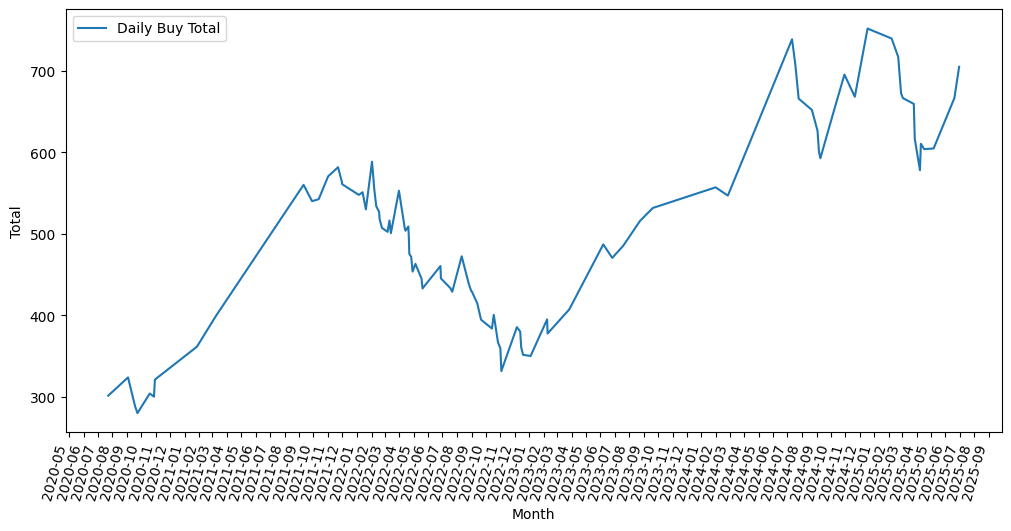

In [12]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# Ensure transaction_date is datetime
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# plot daily and running totals
ax.plot(data['transaction_date'], data['daily_buy_total'], label="Daily Buy Total")

# set locator and formatter for months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# rotate x-ticks
plt.setp(ax.get_xticklabels(), rotation=75, ha='right')

# labels & legend
ax.set_xlabel('Month')
ax.set_ylabel('Total')
ax.legend()
plt.show()
